## A small lesson

Today we will be going over just a touch of unsupervised learning, not from a theoretical perspective but from a practical one. So let's get started:

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/billionaires.csv')

del df['was founder']
del df['inherited']
del df['from emerging']

df.age.replace(-1, np.NaN, inplace=True)
df.founded.replace(0, np.NaN, inplace=True)
df.gdp.replace(0, np.NaN, inplace=True)

In a supervised learning problem we are interested in learning what a specific of our feature will be on new data points. In unsupervised learning we are interested in emergent facts about our data. Today we will ask ourselves one question. That being said there are many different techniques and this is only the smallest part of unsupervised learning. Here is the question:

1. Is there an easy way to visualize our dataset when we have multiple quantitative dims


## PCA

The way that we previously visualized the quantitative variables in the billionaires dataset was using the pairplot, we can look at it bellow:

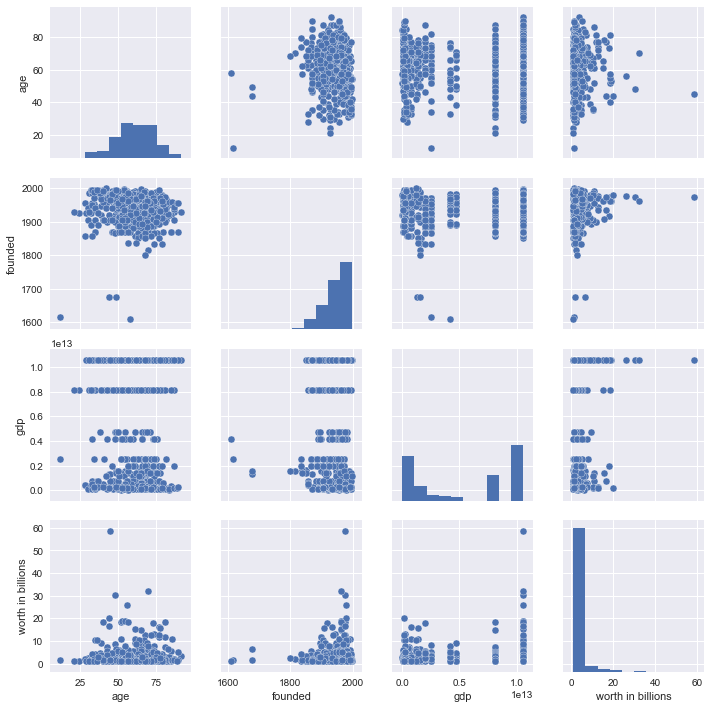

In [3]:
%matplotlib inline

import seaborn as sns

sns.pairplot(df.select_dtypes(['float64']).dropna(), vars=df.select_dtypes(['float64']).columns)

In such a way we could see all the quantitative variables in one plot. But this is somewhat hard to see how billionaires clump up, or distinctive features between them all. Or if we wanted to plot a qualitative variable on top and see if it affects the various quanities, it is often hard, eg.:

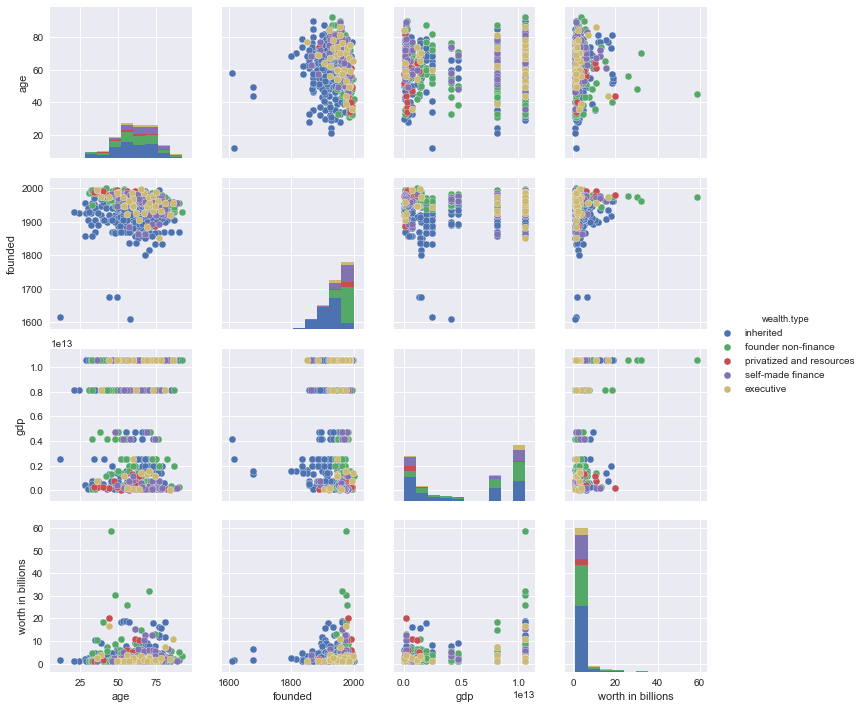

In [4]:
sns.pairplot(df.select_dtypes(['float64']).join(df['wealth.type']).dropna(), 'wealth.type', vars=df.select_dtypes(['float64']).columns)

For me it is hard to see any patterns. Now the real problem is when the dim gets larger than 5, it is nearly impossible to separate them out. This is where dimensionality reduction techniques like PCA come into play.

PCA will reduce the dimension of your dataset to whatever you want and will tell you the tradeoff associated. Let's use PCA below and interpret the results:

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# we choose two components so that we can visualize this in 2D
pca = PCA(2)

# normalize the data before we transform it. This tends to be very important for most ML applications
X = df.select_dtypes(['float64']).join(df['wealth.type']).dropna()
X = scale(X.select_dtypes(['float64']))
transformed_data = pca.fit_transform(X)

transformed_data.shape

(628, 2)

In [23]:
print df.select_dtypes(['float64']).columns
print pca.components_
print pca.explained_variance_ratio_

Index([u'age', u'founded', u'gdp', u'worth in billions'], dtype='object')
[[-0.10180456  0.66336643  0.6381132   0.37734912]
 [ 0.87881463 -0.24251773  0.17148199  0.37344869]]
[ 0.29440353  0.25677717]


PCA attempts to explain the variance in your data. If your numeric columns are highly related (like age and income) then perhaps you only need one number to represent them both. I printed out two things, the components in PCA and the explained variance. The components represent linear combinations of the original columns. So our new column one is -.1 * age + .66 * founded ... and so on. 

The second thing I printed out is the explained variance ratio. The higher this is the more that the columns returned can explain the full data. In our case our two columns explain 55% of our data, meaning that they are not highly correlated and suggesting that PCA is not the best way compress our data. 

Regardless we are already here, so let's plot the result:

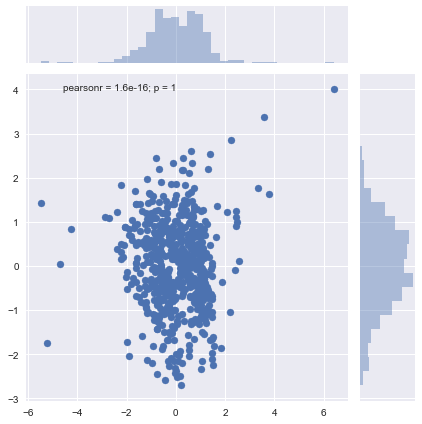

In [29]:
sns.jointplot(transformed_data[:, 0], transformed_data[:, 1])

Remember the dimensions no longer represent any concrete features, but rather an aggregation of a couple of features. We can see if these dimensions correspond to specific qualitative features as well:

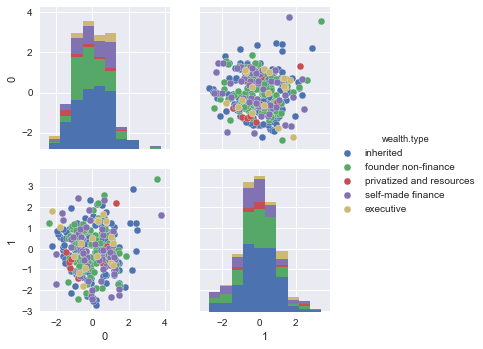

In [36]:
data = pd.DataFrame(transformed_data).join(df.select_dtypes(['float64']).join(df['wealth.type']).dropna()['wealth.type'])
sns.pairplot(data, 'wealth.type', vars=[0,1])

Sometimes we will see that the dimensions correspond to particular quantitative features, sometimes not. In addition we can even feed these transformed features into our learning algorithms. 